# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\rubix\Downloads\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Coffee_Numerical_Wrangled.csv'), index_col = False)

# Image Defaults Changed

In [5]:
plt.rcParams["figure.dpi"] = 300 # Default DPI

# New Dataframe that only includes numbers

In [6]:
df_num = df.select_dtypes(include=np.number)

# Cluster Range and K-Means Defined

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Shows variation as clusters iterate.

score

[-192327854.22227395,
 -67788614.31085491,
 -34864519.85401243,
 -21927186.35349045,
 -14959757.872273358,
 -11309007.194196371,
 -9054175.050657291,
 -7589927.544546733,
 -6448030.299974367]

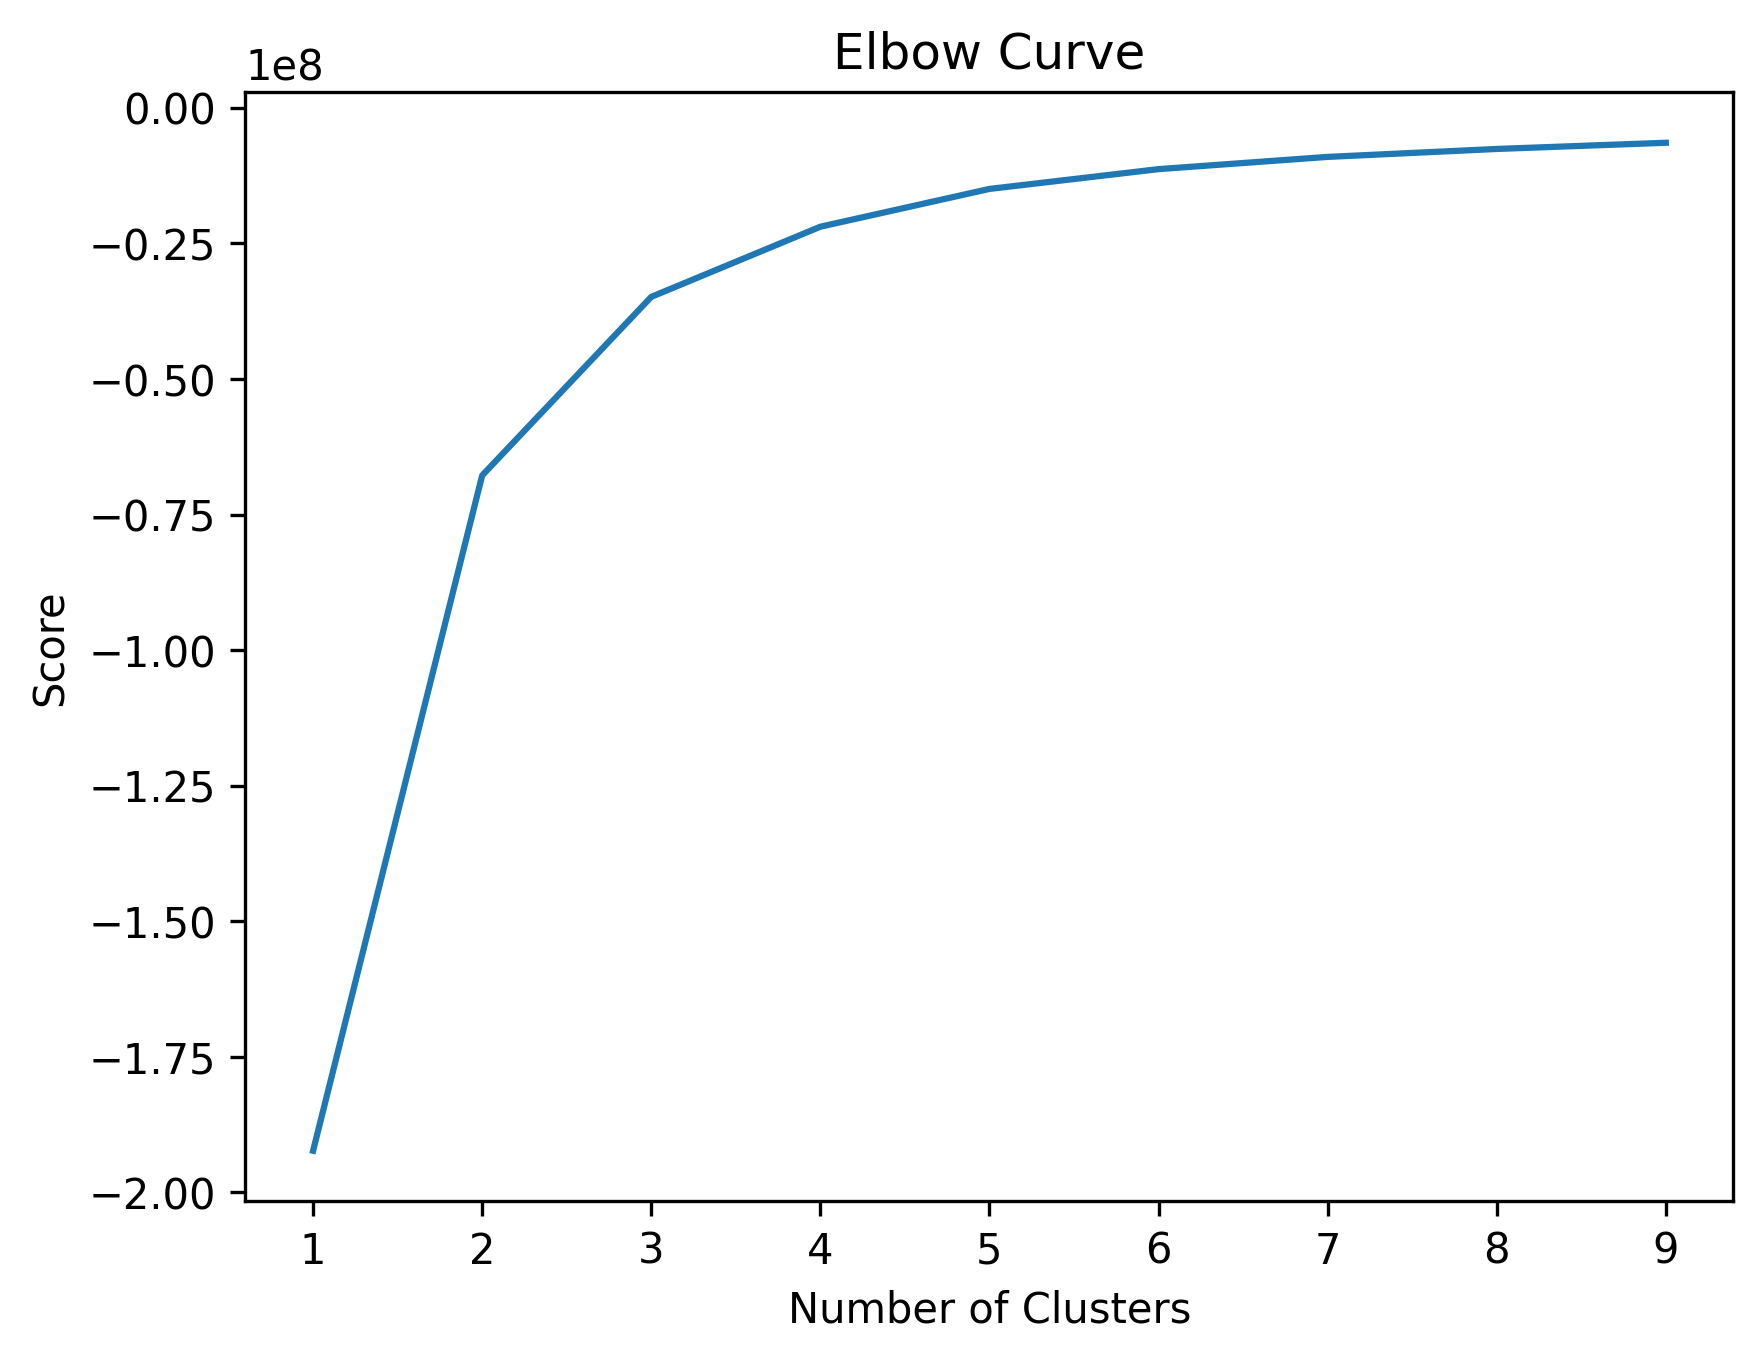

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Create the k-means object and reasoning

In [10]:
kmeans = KMeans(n_clusters = 3) 

I chose 3 because that seems to be the where the slope slows the quickest. The score changes pretty drastically until the space between 3 and 4. This creates clusters that are not too few or too many.

# K-Means Setup and Application

In [11]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

KMeans(n_clusters=3)

In [12]:
df_num['clusters'] = kmeans.fit_predict(df_num)

In [13]:
df_num['clusters'].value_counts()

clusters
0    4380
1    3176
2    2444
Name: count, dtype: int64

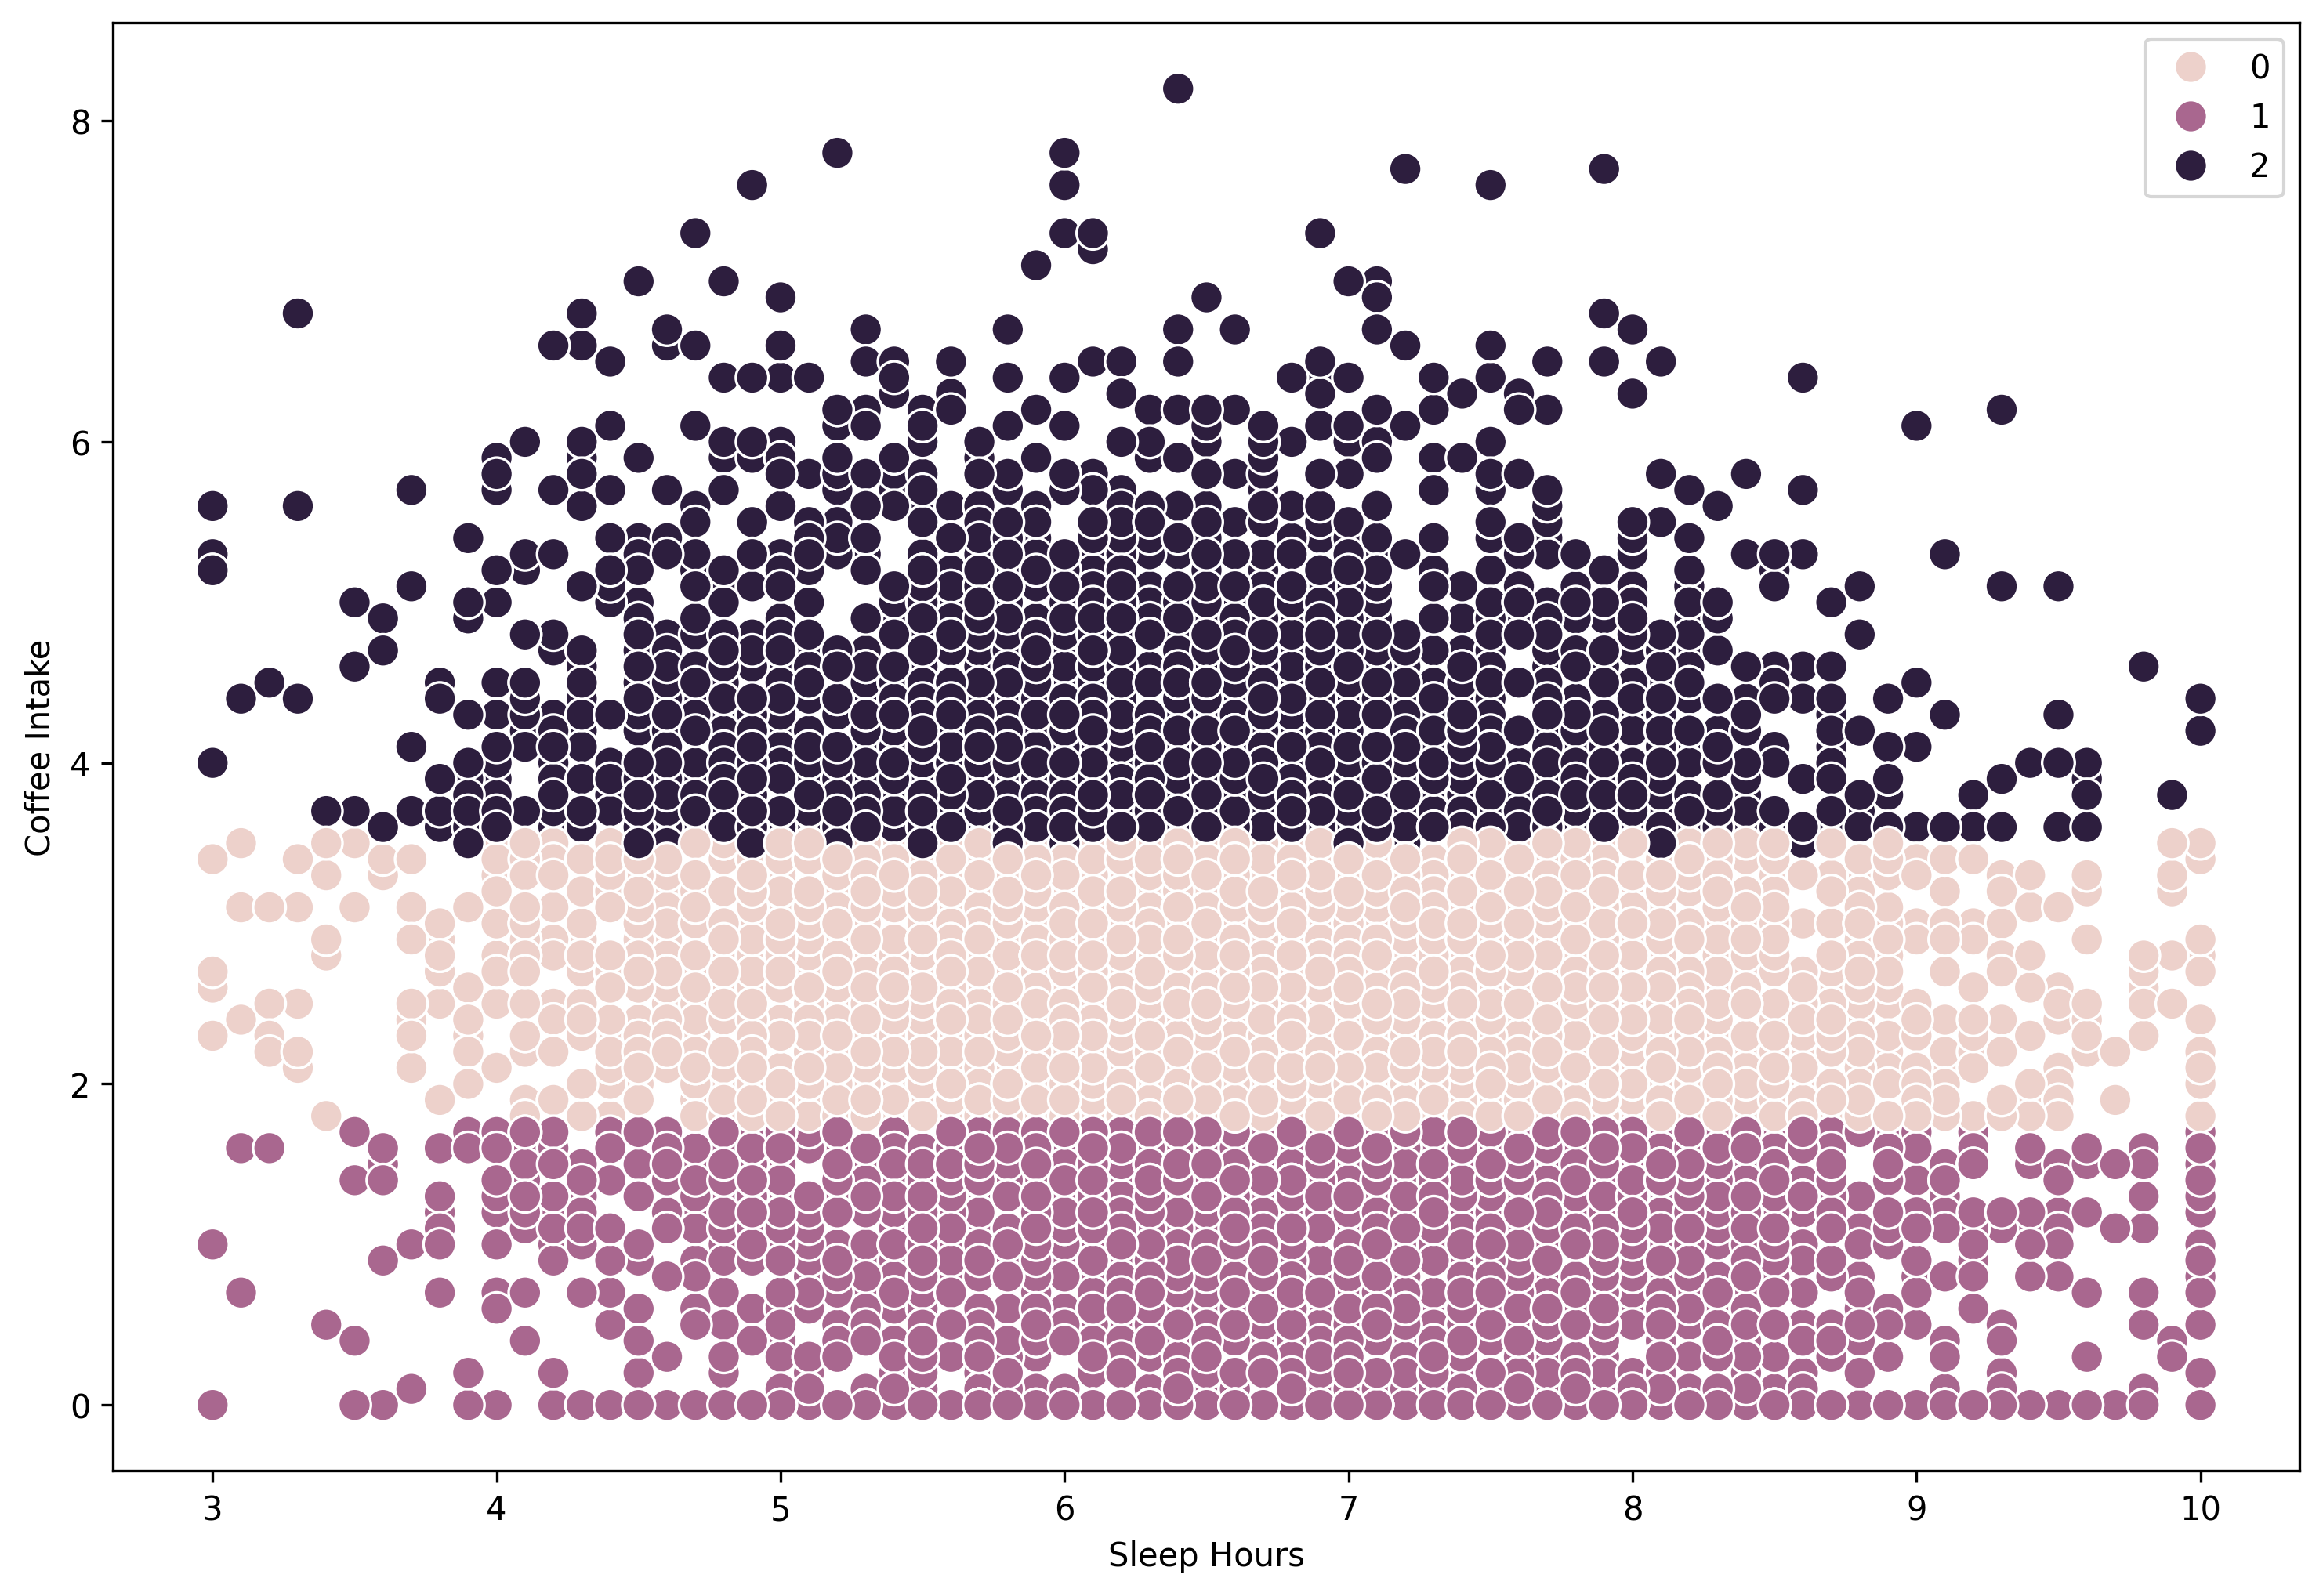

In [23]:
# Plot the clusters for the "Coffee_Intake" and "Sleep_Hours" variables.

cluster_scatter = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Sleep_Hours'], y=df_num['Coffee_Intake'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Sleep Hours') # Label x-axis.
plt.ylabel('Coffee Intake') # Label y-axis.
plt.show()

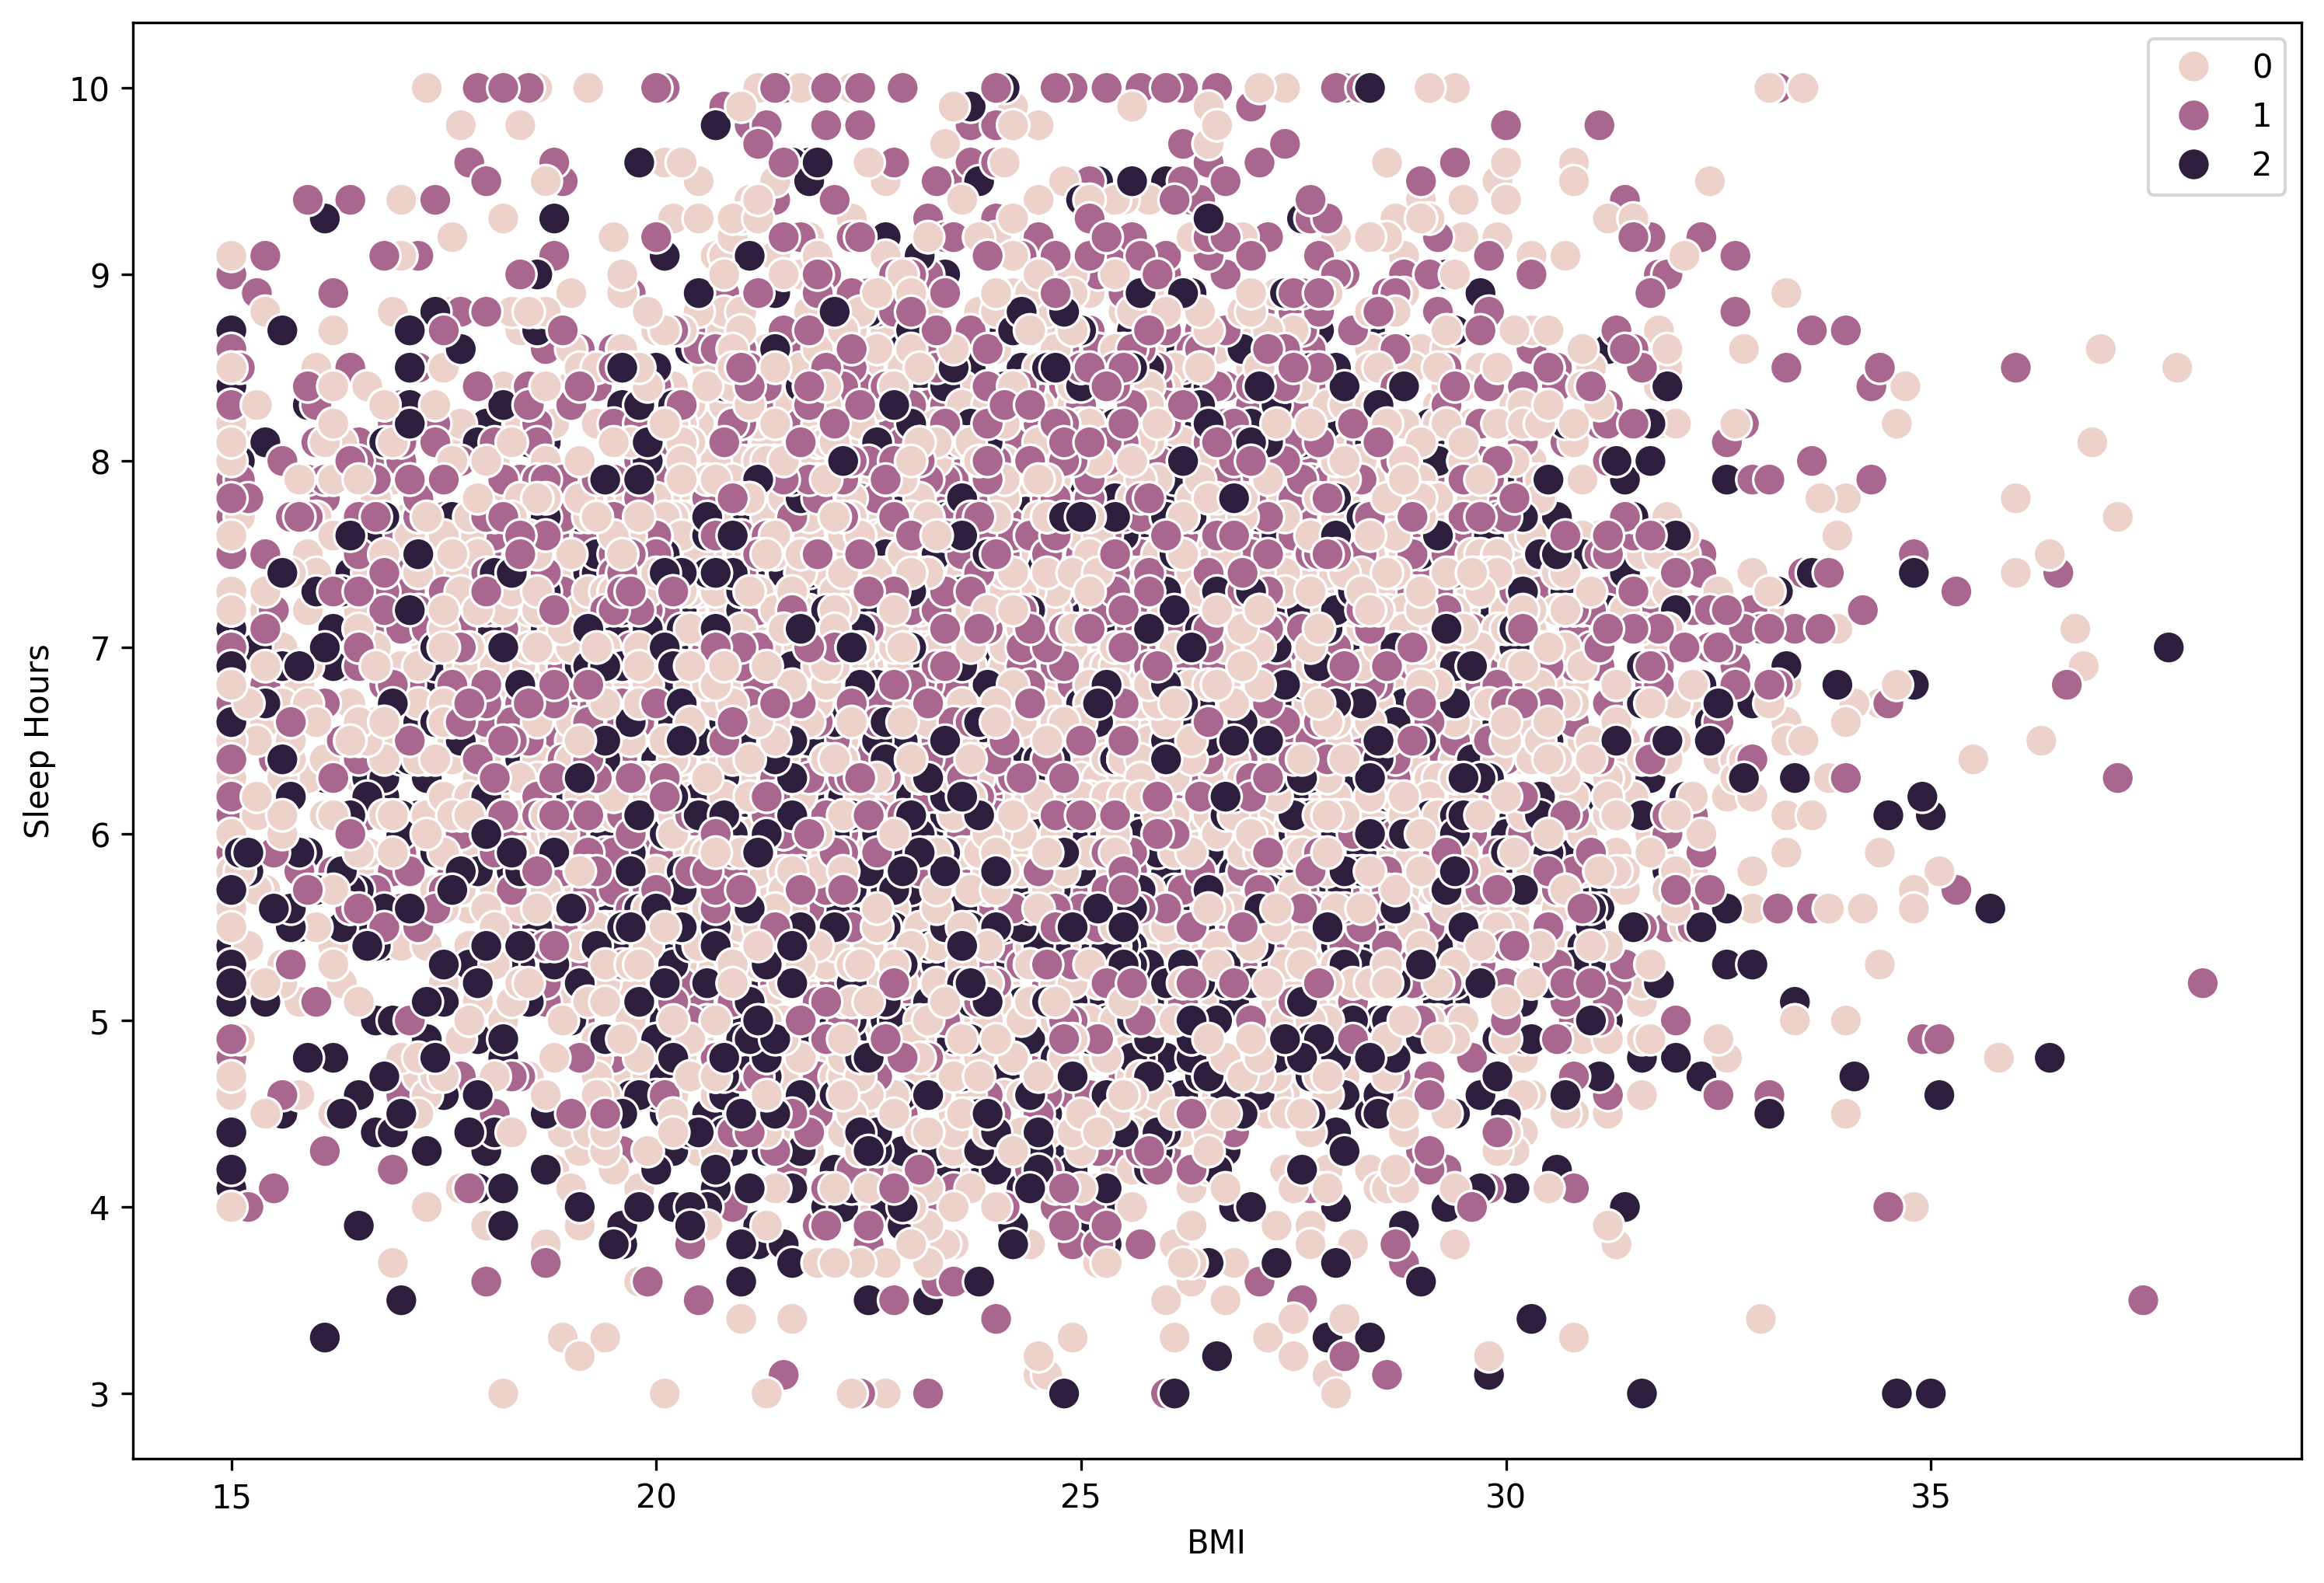

In [15]:
# Plot the clusters for the "BMI" and "Sleep_Hours" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['BMI'], y=df_num['Sleep_Hours'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('BMI') # Label x-axis.
plt.ylabel('Sleep Hours') # Label y-axis.
plt.show()

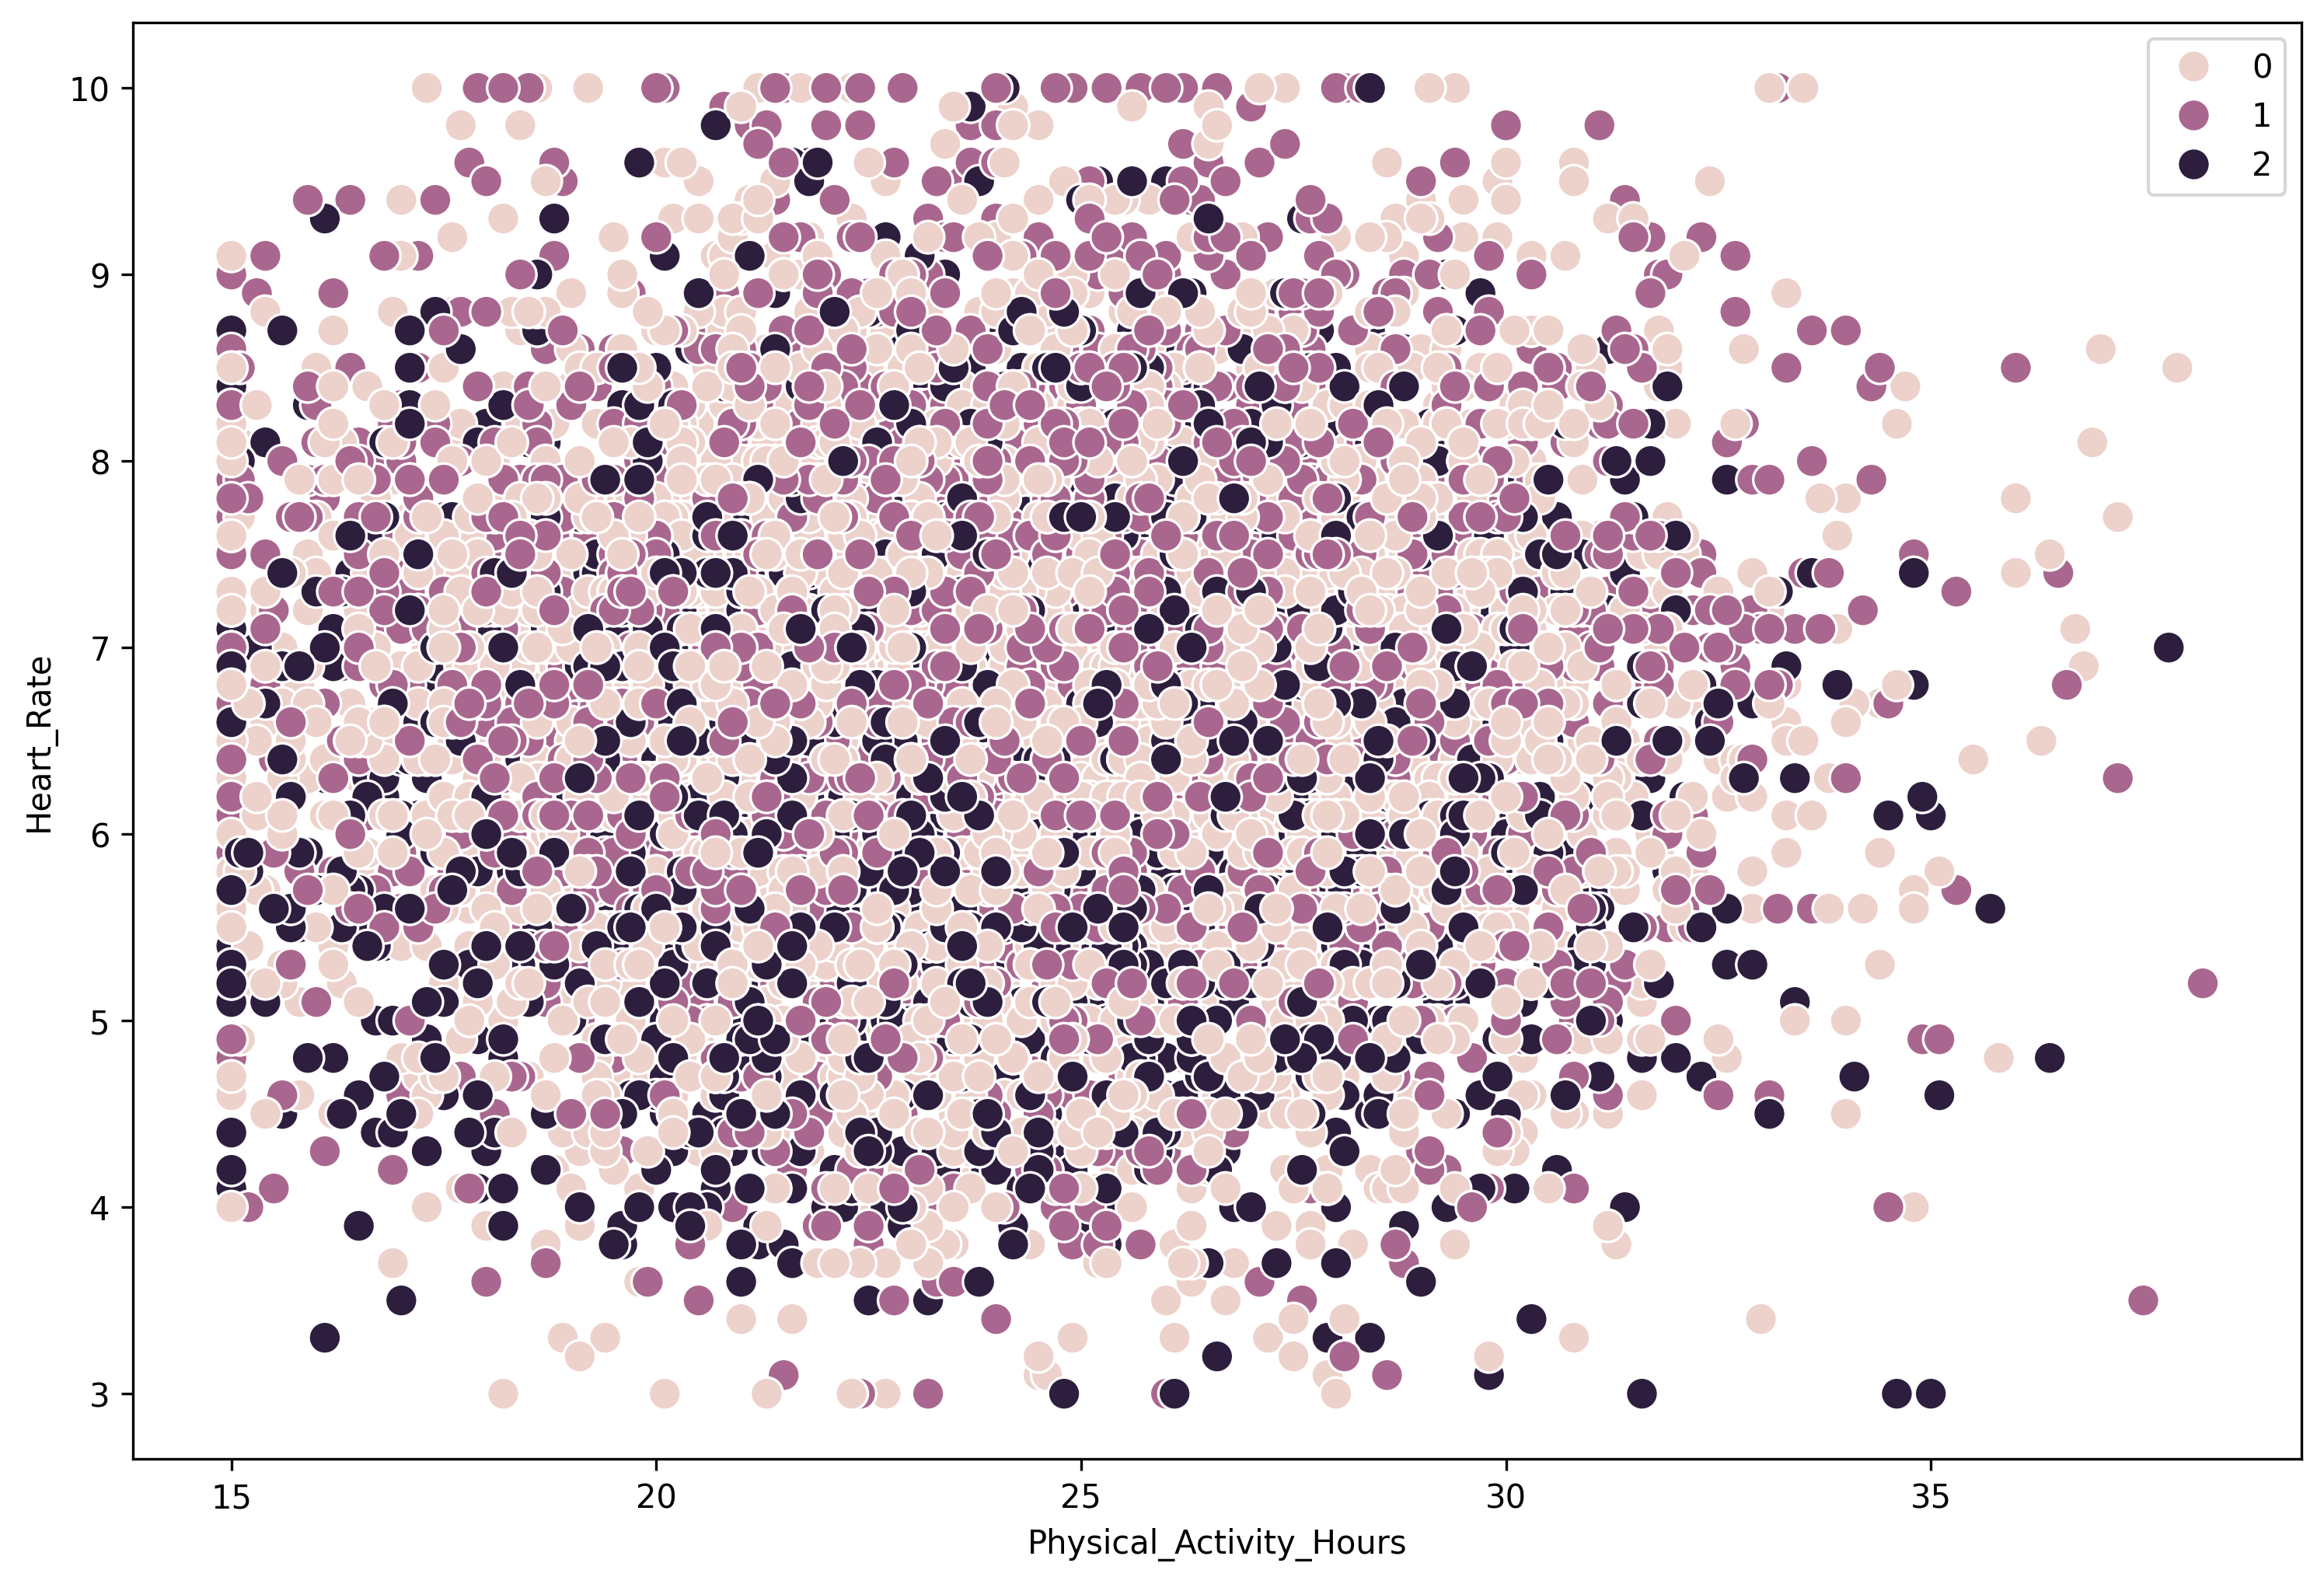

In [16]:
# Plot the clusters for the "Physical_Activity_Hours" and "Heart_Rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['BMI'], y=df_num['Sleep_Hours'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Physical_Activity_Hours') # Label x-axis.
plt.ylabel('Heart_Rate') # Label y-axis.
plt.show()

Coffee_Intake and Sleep_Hours makes a kind of sense from a clustering standpoint (barely), but BMI vs Sleep_Hours and Physical_Activity_Hours vs Heart_Rate make very little sense. They're so mixed they might as well be useless. Almost like someone created gaussian levels of randomness in their synthetic data, haha. I'm sure this will be very useful in the future, but this dataset doesn't seem to have a lot of opportunities for clustering.

In [18]:
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [20]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Coffee_Intake            10000 non-null  float64
 2   Caffeine_mg              10000 non-null  float64
 3   Sleep_Hours              10000 non-null  float64
 4   Sleep_Quality            10000 non-null  int64  
 5   BMI                      10000 non-null  float64
 6   Heart_Rate               10000 non-null  int64  
 7   Stress_Level             10000 non-null  int64  
 8   Physical_Activity_Hours  10000 non-null  float64
 9   Health_Issues            10000 non-null  int64  
 10  clusters                 10000 non-null  int32  
 11  cluster                  10000 non-null  object 
dtypes: float64(5), int32(1), int64(5), object(1)
memory usage: 898.6+ KB


In [22]:
df_num.groupby('cluster').agg({'Age':['mean', 'median'], 
                         'Coffee_Intake':['mean', 'median'], 
                         'Caffeine_mg':['mean', 'median'],
                          'Sleep_Hours':['mean', 'median'],
                               'Sleep_Quality':['mean', 'median'],
                              'BMI':['mean', 'median'],
                              'Heart_Rate':['mean', 'median'],
                              'Stress_Level':['mean', 'median'],
                              'Physical_Activity_Hours':['mean', 'median'],
                              'Health_Issues':['mean', 'median']})

Age        Coffee_Intake        Caffeine_mg          \
                  mean median          mean median        mean  median   
cluster                                                                  
dark purple  34.740180   35.0      4.426678    4.2  420.542512  401.85   
pink         34.892466   34.0      2.619429    2.6  248.872763  249.15   
purple       35.187972   35.0      0.881738    1.0   83.829188   93.50   

            Sleep_Hours        Sleep_Quality               BMI         \
                   mean median          mean median       mean median   
cluster                                                                 
dark purple    6.326432    6.3      2.547463    3.0  23.906588   23.9   
pink           6.623196    6.6      2.734018    3.0  24.009612   24.0   
purple         6.892569    6.9      2.890113    3.0  24.017254   24.0   

            Heart_Rate        Stress_Level        Physical_Activity_Hours  \
                  mean median         mean median                    mean   
cluster                                                                     
dark purple  71.362520   71.0     1.537643    1.0                7.552741   
pink         70.627626   71.0     1.391553    1.0                7.433402   
purple       70.031171   70.0     1.296914    1.0                7.510453   

                   Health_Issues         
            median          mean median  
cluster                                  
dark purple    7.6      1.543781    1.0  
pink           7.4      1.451826    1.0  
purple         7.6      1.392947    1.0

Coffee Intake seems to have some differences and could be clustered. The rest are so similar to each other they can be ignored for further analysis. But grouping by Coffee_Intake against health issues is exactly what the dataset is about so that's a decent finding (clusters in Coffee_Intake and randomness in everything else). I'd like to say that true randomness is basically impossible because of groupings that would occur naturally, but that's more an issue with this particular dataset.

# Export for Visualizations

In [24]:
cluster_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Cluster_Scatter.png'), bbox_inches='tight')